<h1>2nd KL House Price Try</h1>
2nd Try at Making Predictions of KL Properties

In [92]:
#importing libraries and dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
#load the data
df=pd.read_csv('data_kaggle.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53883 entries, 0 to 53882
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       53883 non-null  object 
 1   Price          53635 non-null  object 
 2   Rooms          52177 non-null  object 
 3   Bathrooms      51870 non-null  float64
 4   Car Parks      36316 non-null  float64
 5   Property Type  53858 non-null  object 
 6   Size           52820 non-null  object 
 7   Furnishing     46953 non-null  object 
dtypes: float64(2), object(6)
memory usage: 3.3+ MB


In [94]:
df

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing
0,"KLCC, Kuala Lumpur","RM 1,250,000",2+1,3.0,2.0,Serviced Residence,"Built-up : 1,335 sq. ft.",Fully Furnished
1,"Damansara Heights, Kuala Lumpur","RM 6,800,000",6,7.0,NaN,Bungalow,Land area : 6900 sq. ft.,Partly Furnished
2,"Dutamas, Kuala Lumpur","RM 1,030,000",3,4.0,2.0,Condominium (Corner),"Built-up : 1,875 sq. ft.",Partly Furnished
3,"Cheras, Kuala Lumpur",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Bukit Jalil, Kuala Lumpur","RM 900,000",4+1,3.0,2.0,Condominium (Corner),"Built-up : 1,513 sq. ft.",Partly Furnished
...,...,...,...,...,...,...,...,...
53878,"Bangsar, Kuala Lumpur","RM 5,100,000",5+1,4.0,NaN,Bungalow (Corner),Land area : 7168 sq. ft.,Fully Furnished
53879,"Bangsar, Kuala Lumpur","RM 5,000,000",5,4.0,NaN,Bungalow (Intermediate),Land area : 15000 sq. ft.,Unfurnished
53880,"Bangsar, Kuala Lumpur","RM 5,500,000",5+1,4.0,NaN,Bungalow (Intermediate),Land area : 7168 sq. ft.,Partly Furnished
53881,"Wangsa Maju, Kuala Lumpur","RM 480,000",3,2.0,NaN,Condominium (Intermediate),"Built-up : 1,150 sq. ft.",Unfurnished


In [95]:
#have to set our target first
def target_preprocess(df,col):
    df[col]=df[col].str.replace('RM','').str.replace(',','').apply(pd.to_numeric)
    df=df.loc[df[col].notna()]
    
    return df

In [96]:
df=target_preprocess(df,'Price')
df

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing
0,"KLCC, Kuala Lumpur",1250000.0,2+1,3.0,2.0,Serviced Residence,"Built-up : 1,335 sq. ft.",Fully Furnished
1,"Damansara Heights, Kuala Lumpur",6800000.0,6,7.0,NaN,Bungalow,Land area : 6900 sq. ft.,Partly Furnished
2,"Dutamas, Kuala Lumpur",1030000.0,3,4.0,2.0,Condominium (Corner),"Built-up : 1,875 sq. ft.",Partly Furnished
4,"Bukit Jalil, Kuala Lumpur",900000.0,4+1,3.0,2.0,Condominium (Corner),"Built-up : 1,513 sq. ft.",Partly Furnished
5,"Taman Tun Dr Ismail, Kuala Lumpur",5350000.0,4+2,5.0,4.0,Bungalow,Land area : 7200 sq. ft.,Partly Furnished
...,...,...,...,...,...,...,...,...
53878,"Bangsar, Kuala Lumpur",5100000.0,5+1,4.0,NaN,Bungalow (Corner),Land area : 7168 sq. ft.,Fully Furnished
53879,"Bangsar, Kuala Lumpur",5000000.0,5,4.0,NaN,Bungalow (Intermediate),Land area : 15000 sq. ft.,Unfurnished
53880,"Bangsar, Kuala Lumpur",5500000.0,5+1,4.0,NaN,Bungalow (Intermediate),Land area : 7168 sq. ft.,Partly Furnished
53881,"Wangsa Maju, Kuala Lumpur",480000.0,3,2.0,NaN,Condominium (Intermediate),"Built-up : 1,150 sq. ft.",Unfurnished


In [97]:
#clean up location column
def clean_location(df,col):
    df.loc[:, col] = df[col].str.split(',', n=1, expand=True)[0]
    
    return df

In [98]:
df=clean_location(df,'Location')
df

/var/folders/v4/jpplyq9d7vj4bb3_yglz32000000gn/T/ipykernel_53830/1198383316.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col] = df[col].str.split(',', n=1, expand=True)[0]


,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing
0,KLCC,1250000.0,2+1,3.0,2.0,Serviced Residence,"Built-up : 1,335 sq. ft.",Fully Furnished
1,Damansara Heights,6800000.0,6,7.0,NaN,Bungalow,Land area : 6900 sq. ft.,Partly Furnished
2,Dutamas,1030000.0,3,4.0,2.0,Condominium (Corner),"Built-up : 1,875 sq. ft.",Partly Furnished
4,Bukit Jalil,900000.0,4+1,3.0,2.0,Condominium (Corner),"Built-up : 1,513 sq. ft.",Partly Furnished
5,Taman Tun Dr Ismail,5350000.0,4+2,5.0,4.0,Bungalow,Land area : 7200 sq. ft.,Partly Furnished
...,...,...,...,...,...,...,...,...
53878,Bangsar,5100000.0,5+1,4.0,NaN,Bungalow (Corner),Land area : 7168 sq. ft.,Fully Furnished
53879,Bangsar,5000000.0,5,4.0,NaN,Bungalow (Intermediate),Land area : 15000 sq. ft.,Unfurnished
53880,Bangsar,5500000.0,5+1,4.0,NaN,Bungalow (Intermediate),Land area : 7168 sq. ft.,Partly Furnished
53881,Wangsa Maju,480000.0,3,2.0,NaN,Condominium (Intermediate),"Built-up : 1,150 sq. ft.",Unfurnished


In [99]:
df['Location'].unique()

array(['KLCC', 'Damansara Heights', 'Dutamas', 'Bukit Jalil',
       'Taman Tun Dr Ismail', 'Sri Petaling', 'Bukit Tunku (Kenny Hills)',
       'Mont Kiara', 'Desa ParkCity', 'Bangsar South', 'Ampang Hilir',
       'Kepong', 'Jalan Klang Lama (Old Klang Road)', 'Sungai Besi',
       'KL City', 'KL Sentral', 'Taman Melawati', 'Setapak',
       'City Centre', 'Country Heights Damansara', 'Taman Desa', 'Sentul',
       'Cheras', 'Bangsar', 'Segambut', 'Batu Caves', 'Wangsa Maju',
       'Ampang', 'Sri Hartamas', 'Klcc', 'Bukit Kiara', 'Setiawangsa',
       'OUG', 'Bukit Bintang', 'Jalan Sultan Ismail', 'Chan Sow Lin',
       'Jalan Kuching', 'Bandar Menjalara', 'KL Eco City', 'Seputeh',
       'Sunway SPK', 'Pantai', 'ADIVA Desa ParkCity', 'Kuchai Lama',
       'Jalan Ipoh', 'Mid Valley City', 'Brickfields', 'Desa Pandan',
       'Keramat', 'Pandan Indah', 'Desa Petaling', 'Federal Hill',
       'Other', 'Pandan Perdana', 'Bandar Damai Perdana', 'Puchong',
       'Salak Selatan', 'SEMARAK

In [100]:
df['Property Type'].unique()

array(['Serviced Residence', 'Bungalow', 'Condominium (Corner)',
       'Semi-detached House', '2-sty Terrace/Link House (EndLot)',
       'Apartment (Intermediate)',
       '2-sty Terrace/Link House (Intermediate)',
       'Bungalow (Intermediate)', 'Semi-detached House (Intermediate)',
       'Bungalow (Corner)', 'Serviced Residence (Intermediate)',
       'Condominium', 'Condominium (Intermediate)',
       'Condominium (EndLot)', 'Serviced Residence (Corner)',
       '3-sty Terrace/Link House (Intermediate)',
       'Serviced Residence (Duplex)', '2-sty Terrace/Link House',
       '2-sty Terrace/Link House (Corner)',
       '2.5-sty Terrace/Link House (Intermediate)',
       '3-sty Terrace/Link House (Corner)',
       '3-sty Terrace/Link House (EndLot)',
       '3.5-sty Terrace/Link House (Intermediate)',
       'Serviced Residence (Penthouse)', 'Condominium (Studio)',
       '1-sty Terrace/Link House (Intermediate)',
       '1.5-sty Terrace/Link House (EndLot)', 'Apartment',
      

In [101]:
#define functions to clean room columns
def clean_room_type(x):
    if isinstance(x, int):
        return float(x)
    elif isinstance(x, str):
        if '+' in x:
            nums = [int(n) for n in x.split('+') if n]
            return sum(nums) / len(nums)
        elif x == '20 above':
            return 25.0
        elif x == 'studio':
            return 4.0
    return 3

In [102]:
#apply the functions
df['Rooms'] = df['Rooms'].apply(clean_room_type)

/var/folders/v4/jpplyq9d7vj4bb3_yglz32000000gn/T/ipykernel_53830/2283061720.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rooms'] = df['Rooms'].apply(clean_room_type)


In [103]:
df

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing
0,KLCC,1250000.0,1.5,3.0,2.0,Serviced Residence,"Built-up : 1,335 sq. ft.",Fully Furnished
1,Damansara Heights,6800000.0,3.0,7.0,NaN,Bungalow,Land area : 6900 sq. ft.,Partly Furnished
2,Dutamas,1030000.0,3.0,4.0,2.0,Condominium (Corner),"Built-up : 1,875 sq. ft.",Partly Furnished
4,Bukit Jalil,900000.0,2.5,3.0,2.0,Condominium (Corner),"Built-up : 1,513 sq. ft.",Partly Furnished
5,Taman Tun Dr Ismail,5350000.0,3.0,5.0,4.0,Bungalow,Land area : 7200 sq. ft.,Partly Furnished
...,...,...,...,...,...,...,...,...
53878,Bangsar,5100000.0,3.0,4.0,NaN,Bungalow (Corner),Land area : 7168 sq. ft.,Fully Furnished
53879,Bangsar,5000000.0,3.0,4.0,NaN,Bungalow (Intermediate),Land area : 15000 sq. ft.,Unfurnished
53880,Bangsar,5500000.0,3.0,4.0,NaN,Bungalow (Intermediate),Land area : 7168 sq. ft.,Partly Furnished
53881,Wangsa Maju,480000.0,3.0,2.0,NaN,Condominium (Intermediate),"Built-up : 1,150 sq. ft.",Unfurnished


In [104]:
#defining clean up functions
import ast

def clean_up_size(df, col):
    df[['SizeType', 'SizeValue']] = df[col].str.extract(r'^([^:]+) : (.*) sq\. ft\.$')
    df['SizeValue'] = df['SizeValue'].str.replace(',', '').str.replace('x', '*').str.replace('X', '*')
    
    def evaluate_expression(expr):
        try:
            return ast.literal_eval(expr)
        except:
            return None
    
    df['SizeValue'] = df['SizeValue'].apply(evaluate_expression).astype(float)
    
    return df

In [105]:
df=clean_up_size(df,'Size')
df

/var/folders/v4/jpplyq9d7vj4bb3_yglz32000000gn/T/ipykernel_53830/302776900.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['SizeType', 'SizeValue']] = df[col].str.extract(r'^([^:]+) : (.*) sq\. ft\.$')
/var/folders/v4/jpplyq9d7vj4bb3_yglz32000000gn/T/ipykernel_53830/302776900.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['SizeType', 'SizeValue']] = df[col].str.extract(r'^([^:]+) : (.*) sq\. ft\.$')
/var/folders/v4/jpplyq9d7vj4bb3_yglz32000000gn/T/ipykernel_53830/302776900.py:6: SettingWith

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing,SizeType,SizeValue
0,KLCC,1250000.0,1.5,3.0,2.0,Serviced Residence,"Built-up : 1,335 sq. ft.",Fully Furnished,Built-up,1335.0
1,Damansara Heights,6800000.0,3.0,7.0,NaN,Bungalow,Land area : 6900 sq. ft.,Partly Furnished,Land area,6900.0
2,Dutamas,1030000.0,3.0,4.0,2.0,Condominium (Corner),"Built-up : 1,875 sq. ft.",Partly Furnished,Built-up,1875.0
4,Bukit Jalil,900000.0,2.5,3.0,2.0,Condominium (Corner),"Built-up : 1,513 sq. ft.",Partly Furnished,Built-up,1513.0
5,Taman Tun Dr Ismail,5350000.0,3.0,5.0,4.0,Bungalow,Land area : 7200 sq. ft.,Partly Furnished,Land area,7200.0
...,...,...,...,...,...,...,...,...,...,...
53878,Bangsar,5100000.0,3.0,4.0,NaN,Bungalow (Corner),Land area : 7168 sq. ft.,Fully Furnished,Land area,7168.0
53879,Bangsar,5000000.0,3.0,4.0,NaN,Bungalow (Intermediate),Land area : 15000 sq. ft.,Unfurnished,Land area,15000.0
53880,Bangsar,5500000.0,3.0,4.0,NaN,Bungalow (Intermediate),Land area : 7168 sq. ft.,Partly Furnished,Land area,7168.0
53881,Wangsa Maju,480000.0,3.0,2.0,NaN,Condominium (Intermediate),"Built-up : 1,150 sq. ft.",Unfurnished,Built-up,1150.0


In [106]:
df=df.drop('Size',axis=1)
df

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Furnishing,SizeType,SizeValue
0,KLCC,1250000.0,1.5,3.0,2.0,Serviced Residence,Fully Furnished,Built-up,1335.0
1,Damansara Heights,6800000.0,3.0,7.0,NaN,Bungalow,Partly Furnished,Land area,6900.0
2,Dutamas,1030000.0,3.0,4.0,2.0,Condominium (Corner),Partly Furnished,Built-up,1875.0
4,Bukit Jalil,900000.0,2.5,3.0,2.0,Condominium (Corner),Partly Furnished,Built-up,1513.0
5,Taman Tun Dr Ismail,5350000.0,3.0,5.0,4.0,Bungalow,Partly Furnished,Land area,7200.0
...,...,...,...,...,...,...,...,...,...
53878,Bangsar,5100000.0,3.0,4.0,NaN,Bungalow (Corner),Fully Furnished,Land area,7168.0
53879,Bangsar,5000000.0,3.0,4.0,NaN,Bungalow (Intermediate),Unfurnished,Land area,15000.0
53880,Bangsar,5500000.0,3.0,4.0,NaN,Bungalow (Intermediate),Partly Furnished,Land area,7168.0
53881,Wangsa Maju,480000.0,3.0,2.0,NaN,Condominium (Intermediate),Unfurnished,Built-up,1150.0


In [107]:
#finding out nan value
df.isna().sum()

Location             0
Price                0
Rooms                0
Bathrooms         1962
Car Parks        17441
Property Type        0
Furnishing        6856
SizeType          1153
SizeValue         6907
dtype: int64

In [108]:
df['Car Parks']=df['Car Parks'].fillna(0)
df

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Furnishing,SizeType,SizeValue
0,KLCC,1250000.0,1.5,3.0,2.0,Serviced Residence,Fully Furnished,Built-up,1335.0
1,Damansara Heights,6800000.0,3.0,7.0,0.0,Bungalow,Partly Furnished,Land area,6900.0
2,Dutamas,1030000.0,3.0,4.0,2.0,Condominium (Corner),Partly Furnished,Built-up,1875.0
4,Bukit Jalil,900000.0,2.5,3.0,2.0,Condominium (Corner),Partly Furnished,Built-up,1513.0
5,Taman Tun Dr Ismail,5350000.0,3.0,5.0,4.0,Bungalow,Partly Furnished,Land area,7200.0
...,...,...,...,...,...,...,...,...,...
53878,Bangsar,5100000.0,3.0,4.0,0.0,Bungalow (Corner),Fully Furnished,Land area,7168.0
53879,Bangsar,5000000.0,3.0,4.0,0.0,Bungalow (Intermediate),Unfurnished,Land area,15000.0
53880,Bangsar,5500000.0,3.0,4.0,0.0,Bungalow (Intermediate),Partly Furnished,Land area,7168.0
53881,Wangsa Maju,480000.0,3.0,2.0,0.0,Condominium (Intermediate),Unfurnished,Built-up,1150.0


In [109]:
df['Furnishing']=df['Furnishing'].fillna('Unfurnished')
df

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Furnishing,SizeType,SizeValue
0,KLCC,1250000.0,1.5,3.0,2.0,Serviced Residence,Fully Furnished,Built-up,1335.0
1,Damansara Heights,6800000.0,3.0,7.0,0.0,Bungalow,Partly Furnished,Land area,6900.0
2,Dutamas,1030000.0,3.0,4.0,2.0,Condominium (Corner),Partly Furnished,Built-up,1875.0
4,Bukit Jalil,900000.0,2.5,3.0,2.0,Condominium (Corner),Partly Furnished,Built-up,1513.0
5,Taman Tun Dr Ismail,5350000.0,3.0,5.0,4.0,Bungalow,Partly Furnished,Land area,7200.0
...,...,...,...,...,...,...,...,...,...
53878,Bangsar,5100000.0,3.0,4.0,0.0,Bungalow (Corner),Fully Furnished,Land area,7168.0
53879,Bangsar,5000000.0,3.0,4.0,0.0,Bungalow (Intermediate),Unfurnished,Land area,15000.0
53880,Bangsar,5500000.0,3.0,4.0,0.0,Bungalow (Intermediate),Partly Furnished,Land area,7168.0
53881,Wangsa Maju,480000.0,3.0,2.0,0.0,Condominium (Intermediate),Unfurnished,Built-up,1150.0


In [110]:
df.isna().sum()

Location            0
Price               0
Rooms               0
Bathrooms        1962
Car Parks           0
Property Type       0
Furnishing          0
SizeType         1153
SizeValue        6907
dtype: int64

In [111]:
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44996 entries, 0 to 53882
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       44996 non-null  object 
 1   Price          44996 non-null  float64
 2   Rooms          44996 non-null  float64
 3   Bathrooms      44996 non-null  float64
 4   Car Parks      44996 non-null  float64
 5   Property Type  44996 non-null  object 
 6   Furnishing     44996 non-null  object 
 7   SizeType       44996 non-null  object 
 8   SizeValue      44996 non-null  float64
dtypes: float64(5), object(4)
memory usage: 3.4+ MB


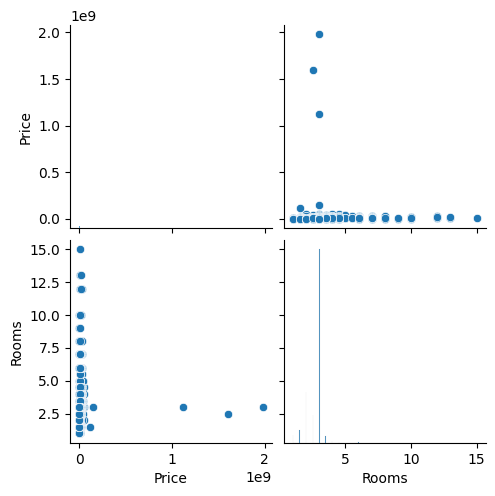

In [112]:
#let's do some pairplot
a=df['Price']
b=df['Rooms']

pairdf=pd.DataFrame({'Price':a,'Rooms':b})

pairplot=sns.pairplot(pairdf)
pairplot

In [113]:
df.describe()

,Price,Rooms,Bathrooms,Car Parks,SizeValue
count,4.499600e+04,44996.000000,44996.000000,44996.000000,4.499600e+04
mean,1.882892e+06,2.702918,3.006601,1.402258,2.644599e+03
std,1.335119e+07,0.610562,1.641168,1.410036,5.279590e+04
min,3.080000e+02,1.000000,1.000000,0.000000,0.000000e+00
25%,5.600000e+05,2.500000,2.000000,0.000000,9.900000e+02
50%,9.500000e+05,3.000000,2.000000,1.000000,1.340500e+03
75%,1.961250e+06,3.000000,4.000000,2.000000,2.315000e+03
max,1.980000e+09,15.000000,20.000000,30.000000,1.100000e+07


In [114]:
df.dtypes

Location          object
Price            float64
Rooms            float64
Bathrooms        float64
Car Parks        float64
Property Type     object
Furnishing        object
SizeType          object
SizeValue        float64
dtype: object

In [115]:
df['Price']=df['Price']/1000000
df

/var/folders/v4/jpplyq9d7vj4bb3_yglz32000000gn/T/ipykernel_53830/256052615.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price']=df['Price']/1000000


,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Furnishing,SizeType,SizeValue
0,KLCC,1.25,1.5,3.0,2.0,Serviced Residence,Fully Furnished,Built-up,1335.0
1,Damansara Heights,6.80,3.0,7.0,0.0,Bungalow,Partly Furnished,Land area,6900.0
2,Dutamas,1.03,3.0,4.0,2.0,Condominium (Corner),Partly Furnished,Built-up,1875.0
4,Bukit Jalil,0.90,2.5,3.0,2.0,Condominium (Corner),Partly Furnished,Built-up,1513.0
5,Taman Tun Dr Ismail,5.35,3.0,5.0,4.0,Bungalow,Partly Furnished,Land area,7200.0
...,...,...,...,...,...,...,...,...,...
53878,Bangsar,5.10,3.0,4.0,0.0,Bungalow (Corner),Fully Furnished,Land area,7168.0
53879,Bangsar,5.00,3.0,4.0,0.0,Bungalow (Intermediate),Unfurnished,Land area,15000.0
53880,Bangsar,5.50,3.0,4.0,0.0,Bungalow (Intermediate),Partly Furnished,Land area,7168.0
53881,Wangsa Maju,0.48,3.0,2.0,0.0,Condominium (Intermediate),Unfurnished,Built-up,1150.0


In [116]:
df.describe()

,Price,Rooms,Bathrooms,Car Parks,SizeValue
count,44996.000000,44996.000000,44996.000000,44996.000000,4.499600e+04
mean,1.882892,2.702918,3.006601,1.402258,2.644599e+03
std,13.351193,0.610562,1.641168,1.410036,5.279590e+04
min,0.000308,1.000000,1.000000,0.000000,0.000000e+00
25%,0.560000,2.500000,2.000000,0.000000,9.900000e+02
50%,0.950000,3.000000,2.000000,1.000000,1.340500e+03
75%,1.961250,3.000000,4.000000,2.000000,2.315000e+03
max,1980.000000,15.000000,20.000000,30.000000,1.100000e+07


In [119]:
df=df.loc[df['Price']<10]
df

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Furnishing,SizeType,SizeValue
0,KLCC,1.25,1.5,3.0,2.0,Serviced Residence,Fully Furnished,Built-up,1335.0
1,Damansara Heights,6.80,3.0,7.0,0.0,Bungalow,Partly Furnished,Land area,6900.0
2,Dutamas,1.03,3.0,4.0,2.0,Condominium (Corner),Partly Furnished,Built-up,1875.0
4,Bukit Jalil,0.90,2.5,3.0,2.0,Condominium (Corner),Partly Furnished,Built-up,1513.0
5,Taman Tun Dr Ismail,5.35,3.0,5.0,4.0,Bungalow,Partly Furnished,Land area,7200.0
...,...,...,...,...,...,...,...,...,...
53878,Bangsar,5.10,3.0,4.0,0.0,Bungalow (Corner),Fully Furnished,Land area,7168.0
53879,Bangsar,5.00,3.0,4.0,0.0,Bungalow (Intermediate),Unfurnished,Land area,15000.0
53880,Bangsar,5.50,3.0,4.0,0.0,Bungalow (Intermediate),Partly Furnished,Land area,7168.0
53881,Wangsa Maju,0.48,3.0,2.0,0.0,Condominium (Intermediate),Unfurnished,Built-up,1150.0


In [120]:
df.describe()

,Price,Rooms,Bathrooms,Car Parks,SizeValue
count,44229.000000,44229.000000,44229.000000,44229.000000,4.422900e+04
mean,1.552384,2.689276,2.937213,1.369983,2.431497e+03
std,1.603770,0.584087,1.540686,1.286505,5.312243e+04
min,0.000308,1.000000,1.000000,0.000000,0.000000e+00
25%,0.555000,2.500000,2.000000,0.000000,9.810000e+02
50%,0.930000,3.000000,2.000000,1.000000,1.320000e+03
75%,1.880000,3.000000,4.000000,2.000000,2.200000e+03
max,9.980300,15.000000,20.000000,30.000000,1.100000e+07


In [121]:
from sklearn.preprocessing import LabelEncoder
#let's define the function for label encoding
def label_encoding(df):
    for column in df.columns:
        if df[column].dtype == 'object':
            df[column]=df[column].astype(str)
            le=LabelEncoder()
            df[column]=le.fit_transform(df[column])   
    return df

In [122]:
df=label_encoding(df)
df

/var/folders/v4/jpplyq9d7vj4bb3_yglz32000000gn/T/ipykernel_53830/1516417613.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column]=df[column].astype(str)
/var/folders/v4/jpplyq9d7vj4bb3_yglz32000000gn/T/ipykernel_53830/1516417613.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column]=le.fit_transform(df[column])
/var/folders/v4/jpplyq9d7vj4bb3_yglz32000000gn/T/ipykernel_53830/1516417613.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Furnishing,SizeType,SizeValue
0,40,1.25,1.5,3.0,2.0,79,0,0,1335.0
1,23,6.80,3.0,7.0,0.0,44,1,1,6900.0
2,27,1.03,3.0,4.0,2.0,56,1,0,1875.0
4,14,0.90,2.5,3.0,2.0,56,1,0,1513.0
5,82,5.35,3.0,5.0,4.0,44,1,1,7200.0
...,...,...,...,...,...,...,...,...,...
53878,8,5.10,3.0,4.0,0.0,45,0,1,7168.0
53879,8,5.00,3.0,4.0,0.0,48,2,1,15000.0
53880,8,5.50,3.0,4.0,0.0,48,1,1,7168.0
53881,88,0.48,3.0,2.0,0.0,59,2,0,1150.0


In [123]:
df=df.reset_index(drop=True)
df

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Furnishing,SizeType,SizeValue
0,40,1.25,1.5,3.0,2.0,79,0,0,1335.0
1,23,6.80,3.0,7.0,0.0,44,1,1,6900.0
2,27,1.03,3.0,4.0,2.0,56,1,0,1875.0
3,14,0.90,2.5,3.0,2.0,56,1,0,1513.0
4,82,5.35,3.0,5.0,4.0,44,1,1,7200.0
...,...,...,...,...,...,...,...,...,...
44224,8,5.10,3.0,4.0,0.0,45,0,1,7168.0
44225,8,5.00,3.0,4.0,0.0,48,2,1,15000.0
44226,8,5.50,3.0,4.0,0.0,48,1,1,7168.0
44227,88,0.48,3.0,2.0,0.0,59,2,0,1150.0


In [124]:
#and now let's split our data for X and y
X=df.drop('Price',axis=1)
y=df.Price

In [125]:
#import additional libraries and dependencies
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error
import xgboost as xgb

In [126]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=429)

In [127]:
#let's call xgboost
reg=xgb.XGBRegressor(random_state=429)

In [128]:
#library for parameter search
params={
    "n_estimators":[300,500,1000],
    "max_depth": [12,24,50],
    "gamma": [0.01,0.1],
    "learning_rate": [0.01,0.1,1]
}

In [129]:
grid=GridSearchCV(estimator=reg,
                  param_grid=params,
                  scoring=["r2","neg_root_mean_squared_error"],
                  refit="r2",
                  cv=3,
                  verbose=100                 
)

In [130]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV 1/3; 1/54] START gamma=0.01, learning_rate=0.01, max_depth=12, n_estimators=300
[CV 1/3; 1/54] END gamma=0.01, learning_rate=0.01, max_depth=12, n_estimators=300; neg_root_mean_squared_error: (test=-0.541) r2: (test=0.888) total time=   6.9s
[CV 2/3; 1/54] START gamma=0.01, learning_rate=0.01, max_depth=12, n_estimators=300
[CV 2/3; 1/54] END gamma=0.01, learning_rate=0.01, max_depth=12, n_estimators=300; neg_root_mean_squared_error: (test=-0.532) r2: (test=0.891) total time=   5.7s
[CV 3/3; 1/54] START gamma=0.01, learning_rate=0.01, max_depth=12, n_estimators=300
[CV 3/3; 1/54] END gamma=0.01, learning_rate=0.01, max_depth=12, n_estimators=300; neg_root_mean_squared_error: (test=-0.496) r2: (test=0.901) total time=   5.6s
[CV 1/3; 2/54] START gamma=0.01, learning_rate=0.01, max_depth=12, n_estimators=500
[CV 1/3; 2/54] END gamma=0.01, learning_rate=0.01, max_depth=12, n_estimators=500; neg_root_mean_squared_error: (tes

[CV 1/3; 12/54] END gamma=0.01, learning_rate=0.1, max_depth=12, n_estimators=1000; neg_root_mean_squared_error: (test=-0.513) r2: (test=0.900) total time=  13.1s
[CV 2/3; 12/54] START gamma=0.01, learning_rate=0.1, max_depth=12, n_estimators=1000
[CV 2/3; 12/54] END gamma=0.01, learning_rate=0.1, max_depth=12, n_estimators=1000; neg_root_mean_squared_error: (test=-0.499) r2: (test=0.904) total time=  14.2s
[CV 3/3; 12/54] START gamma=0.01, learning_rate=0.1, max_depth=12, n_estimators=1000
[CV 3/3; 12/54] END gamma=0.01, learning_rate=0.1, max_depth=12, n_estimators=1000; neg_root_mean_squared_error: (test=-0.481) r2: (test=0.907) total time=  13.8s
[CV 1/3; 13/54] START gamma=0.01, learning_rate=0.1, max_depth=24, n_estimators=300
[CV 1/3; 13/54] END gamma=0.01, learning_rate=0.1, max_depth=24, n_estimators=300; neg_root_mean_squared_error: (test=-0.534) r2: (test=0.891) total time=  10.5s
[CV 2/3; 13/54] START gamma=0.01, learning_rate=0.1, max_depth=24, n_estimators=300
[CV 2/3; 13

[CV 2/3; 23/54] END gamma=0.01, learning_rate=1, max_depth=24, n_estimators=500; neg_root_mean_squared_error: (test=-0.638) r2: (test=0.844) total time=  19.1s
[CV 3/3; 23/54] START gamma=0.01, learning_rate=1, max_depth=24, n_estimators=500
[CV 3/3; 23/54] END gamma=0.01, learning_rate=1, max_depth=24, n_estimators=500; neg_root_mean_squared_error: (test=-0.641) r2: (test=0.835) total time=  19.1s
[CV 1/3; 24/54] START gamma=0.01, learning_rate=1, max_depth=24, n_estimators=1000
[CV 1/3; 24/54] END gamma=0.01, learning_rate=1, max_depth=24, n_estimators=1000; neg_root_mean_squared_error: (test=-0.634) r2: (test=0.846) total time=  42.3s
[CV 2/3; 24/54] START gamma=0.01, learning_rate=1, max_depth=24, n_estimators=1000
[CV 2/3; 24/54] END gamma=0.01, learning_rate=1, max_depth=24, n_estimators=1000; neg_root_mean_squared_error: (test=-0.638) r2: (test=0.844) total time=  35.6s
[CV 3/3; 24/54] START gamma=0.01, learning_rate=1, max_depth=24, n_estimators=1000
[CV 3/3; 24/54] END gamma=0

[CV 3/3; 34/54] END gamma=0.1, learning_rate=0.01, max_depth=50, n_estimators=300; neg_root_mean_squared_error: (test=-0.505) r2: (test=0.898) total time=  20.1s
[CV 1/3; 35/54] START gamma=0.1, learning_rate=0.01, max_depth=50, n_estimators=500
[CV 1/3; 35/54] END gamma=0.1, learning_rate=0.01, max_depth=50, n_estimators=500; neg_root_mean_squared_error: (test=-0.527) r2: (test=0.894) total time=  38.4s
[CV 2/3; 35/54] START gamma=0.1, learning_rate=0.01, max_depth=50, n_estimators=500
[CV 2/3; 35/54] END gamma=0.1, learning_rate=0.01, max_depth=50, n_estimators=500; neg_root_mean_squared_error: (test=-0.511) r2: (test=0.900) total time=  38.3s
[CV 3/3; 35/54] START gamma=0.1, learning_rate=0.01, max_depth=50, n_estimators=500
[CV 3/3; 35/54] END gamma=0.1, learning_rate=0.01, max_depth=50, n_estimators=500; neg_root_mean_squared_error: (test=-0.489) r2: (test=0.904) total time=  38.6s
[CV 1/3; 36/54] START gamma=0.1, learning_rate=0.01, max_depth=50, n_estimators=1000
[CV 1/3; 36/54]

[CV 1/3; 46/54] END gamma=0.1, learning_rate=1, max_depth=12, n_estimators=300; neg_root_mean_squared_error: (test=-0.641) r2: (test=0.843) total time=   4.5s
[CV 2/3; 46/54] START gamma=0.1, learning_rate=1, max_depth=12, n_estimators=300
[CV 2/3; 46/54] END gamma=0.1, learning_rate=1, max_depth=12, n_estimators=300; neg_root_mean_squared_error: (test=-0.642) r2: (test=0.842) total time=   4.7s
[CV 3/3; 46/54] START gamma=0.1, learning_rate=1, max_depth=12, n_estimators=300
[CV 3/3; 46/54] END gamma=0.1, learning_rate=1, max_depth=12, n_estimators=300; neg_root_mean_squared_error: (test=-0.609) r2: (test=0.851) total time=   4.6s
[CV 1/3; 47/54] START gamma=0.1, learning_rate=1, max_depth=12, n_estimators=500
[CV 1/3; 47/54] END gamma=0.1, learning_rate=1, max_depth=12, n_estimators=500; neg_root_mean_squared_error: (test=-0.641) r2: (test=0.843) total time=   7.5s
[CV 2/3; 47/54] START gamma=0.1, learning_rate=1, max_depth=12, n_estimators=500
[CV 2/3; 47/54] END gamma=0.1, learning_

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=429, ...),
             param_grid={'gamma': [0.01, 0.1], 'learning_rate': [0.01, 0.1, 1],
                         'max_depth': [12, 24, 50],
                         'n_estimators': [300, 500, 1000]},
             refit='r2', scoring=['r2', 'neg_root_mean_squared_error'],
             verbose=100)

In [131]:
grid.best_score_

0.905836955016035

In [132]:
final_reg=grid.best_estimator_

In [133]:
final_reg.save_model('housereg.json')